# How are in-demand skills trending for Data Analysts?

#### Methodology
1. Aggregate skill counts monthly
2. Re-analyze based on percentage of total jobs
3. Plot the monthly skill demand

## Import Libraries and Data

In [1]:
# Importing Libraries
import ast
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt  

# Loading Data
df = pd.read_csv('../Project/data/job_postings_flat.csv')

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

# Filter for 2025 data
df = df[df['job_posted_date'].dt.year == 2025]

## Group the Skills by Month

Filter for Data Analyst roles in the US, extract the month from each posting date, and explode the skills column so each skill gets its own row.

In [2]:
## Skill count per month for data analysts
df_DA_US = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()

df_DA_US['job_posted_month_no'] = df_DA_US['job_posted_date'].dt.month

# Explode job_skills column
df_DA_US_explode = df_DA_US.explode('job_skills')

### Pivot in Prep for Plotting

Create a pivot table with months as rows and skills as columns to see how each skill's count changes month by month.

In [3]:
# Group by month and job_skills
df_DA_US_pivot = df_DA_US_explode.pivot_table(index='job_posted_month_no', columns='job_skills',  aggfunc='size', fill_value=0)

df_DA_US_pivot

job_skills,airflow,airtable,alteryx,angular,ansible,apl,arch,asana,asp.net,assembly,...,vue.js,watson,webex,windows,wire,word,workfront,wrike,yarn,zoom
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,
1,23,1,137,15,1,9,0,1,7,8,...,0,1,0,67,14,580,3,0,0,16
2,37,21,155,58,1,1,8,2,2,6,...,0,1,0,80,4,601,0,0,0,6
3,46,3,98,3,5,2,1,3,1,7,...,3,2,1,65,18,571,0,0,2,32
4,15,7,108,5,4,4,1,1,3,10,...,0,1,1,58,4,403,2,0,3,11
5,21,5,104,11,1,0,0,6,3,9,...,2,0,3,27,3,280,1,0,1,4
6,17,10,106,12,6,0,3,4,2,6,...,0,2,3,39,4,322,0,1,1,6
7,38,5,63,6,3,0,1,4,1,8,...,0,0,0,25,1,328,1,0,1,15
8,35,2,71,1,3,2,1,6,2,7,...,0,1,0,24,3,301,2,1,1,4
9,18,0,61,1,2,2,2,2,0,3,...,1,0,0,10,3,178,0,1,0,1


#### Sort columns by total count and convert month numbers to names

Sort skills from most to least mentioned across all months.

In [4]:
# sorts by count
df_DA_US_pivot.loc['Total'] = df_DA_US_pivot.sum()
df_DA_US_pivot = df_DA_US_pivot[df_DA_US_pivot.loc['Total'].sort_values(ascending=False).index]
df_DA_US_pivot = df_DA_US_pivot.drop('Total')

df_DA_US_pivot

job_skills,sql,excel,python,tableau,power bi,r,sas,word,powerpoint,azure,...,mlr,codecommit,homebrew,f#,couchdb,digitalocean,openstack,msaccess,kali,ruby on rails
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,
1,2637,2347,1745,1429,1137,1006,944,580,517,234,...,0,1,0,1,0,0,0,0,0,0
2,3130,2609,2193,1950,1545,1033,760,601,555,424,...,0,0,0,0,0,0,0,0,0,0
3,2730,2135,1721,1430,1145,965,1102,571,570,272,...,0,0,0,0,0,0,0,0,0,0
4,1950,1620,1202,1031,984,681,782,403,356,201,...,0,0,0,0,0,1,0,0,0,0
5,1712,1340,1186,919,872,634,644,280,291,196,...,0,0,0,0,0,0,0,0,0,1
6,1823,1386,1119,974,887,548,602,322,315,208,...,0,0,0,0,0,0,0,0,1,0
7,1883,1491,1193,1082,954,680,476,328,314,227,...,0,0,0,0,0,0,0,0,0,0
8,2249,1648,1380,1212,1078,739,606,301,329,251,...,1,0,0,0,0,0,0,0,0,0
9,1261,874,830,686,646,401,310,178,163,169,...,0,0,1,0,0,0,0,0,0,0


## Plot the Monthly Skill Counts

Plot the top 5 skills over the 12 months.

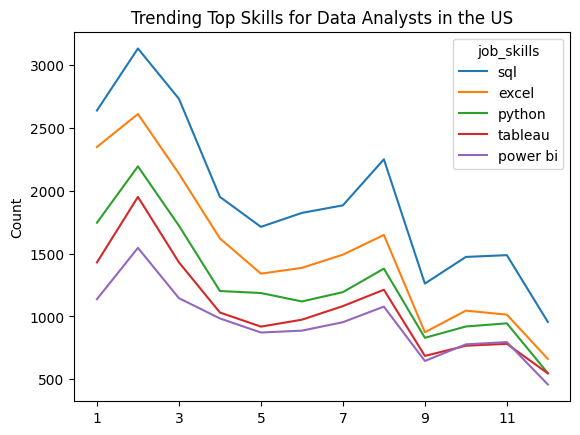

In [5]:
df_DA_US_pivot.iloc[:, :5].plot(kind='line')

plt.title('Trending Top Skills for Data Analysts in the US')
plt.ylabel('Count')
plt.xlabel('')
plt.show()

Raw counts can be misleading since the number of postings varies by month. Percentages normalize the data and show the real trend.

## Calculate Percentage of Total Jobs

Get the total number of Data Analyst postings per month to use as the denominator.

In [6]:
# Get monthly totals
DA_totals = df_DA_US.groupby('job_posted_month_no').size()

DA_totals

job_posted_month_no
1     9751
2     9637
3     7907
4     5586
5     5359
6     3919
7     4428
8     5256
9     3001
10    3633
11    3333
12    2495
dtype: int64

Divide each month's skill counts by the monthly total to get percentages. Also convert month numbers to abbreviated names for cleaner plotting.

In [7]:
# divide first 12 rows of df_DA_pivot by DA_totals
df_DA_US_percent = df_DA_US_pivot.iloc[:12].div(DA_totals/100, axis=0)

# changes month number to month name
df_DA_US_percent = df_DA_US_percent.reset_index()
df_DA_US_percent['job_posted_month'] = df_DA_US_percent['job_posted_month_no'].apply(lambda x: pd.to_datetime(x, format='%m').strftime('%b'))
df_DA_US_percent = df_DA_US_percent.set_index('job_posted_month')
df_DA_US_percent = df_DA_US_percent.drop(columns='job_posted_month_no')

df_DA_US_percent

job_skills,sql,excel,python,tableau,power bi,r,sas,word,powerpoint,azure,...,mlr,codecommit,homebrew,f#,couchdb,digitalocean,openstack,msaccess,kali,ruby on rails
job_posted_month,,,,,,,,,,,,,,,,,,,,,
Jan,27.043380,24.069326,17.895600,14.654907,11.660343,10.316891,9.681058,5.948108,5.302020,2.399754,...,0.000000,0.010255,0.000000,0.010255,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000
Feb,32.478987,27.072740,22.756044,20.234513,16.031960,10.719103,7.886272,6.236381,5.759054,4.399709,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000
Mar,34.526369,27.001391,21.765524,18.085241,14.480840,12.204376,13.937018,7.221449,7.208802,3.439990,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000
Apr,34.908700,29.001074,21.518081,18.456856,17.615467,12.191192,13.999284,7.214465,6.373076,3.598281,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.017902,0.000000,0.00000,0.000000,0.00000
May,31.946259,25.004665,22.130995,17.148722,16.271692,11.830565,12.017167,5.224855,5.430118,3.657399,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.01866
Jun,46.516969,35.366165,28.553202,24.853279,22.633325,13.983159,15.361061,8.216382,8.037765,5.307476,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.025517,0.00000
Jul,42.524842,33.672087,26.942186,24.435411,21.544715,15.356820,10.749774,7.407407,7.091238,5.126468,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000
Aug,42.789193,31.354642,26.255708,23.059361,20.509893,14.060122,11.529680,5.726788,6.259513,4.775495,...,0.019026,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000
Sep,42.019327,29.123625,27.657448,22.859047,21.526158,13.362213,10.329890,5.931356,5.431523,5.631456,...,0.000000,0.000000,0.033322,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000


## Plot Monthly Skill Demand

Line plot showing the top 5 skills as a percentage of total monthly postings, with direct labels instead of a legend for readability.

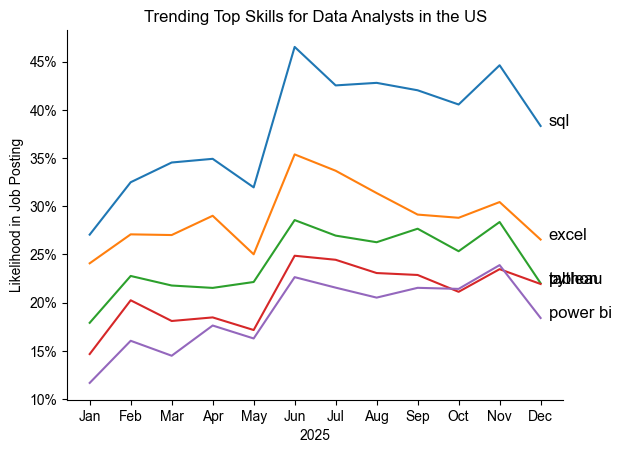

In [8]:
from matplotlib.ticker import PercentFormatter

df_plot = df_DA_US_percent.iloc[:, :5]
sns.lineplot(data=df_plot, dashes=False, legend='full', palette='tab10')
sns.set_theme(style='ticks')
sns.despine() # remove top and right spines

plt.title('Trending Top Skills for Data Analysts in the US')
plt.ylabel('Likelihood in Job Posting')
plt.xlabel('2025')
plt.legend().remove()
plt.gca().yaxis.set_major_formatter(PercentFormatter(decimals=0))

# annotate the plot with the top 5 skills using plt.text()
for i in range(5):
    plt.text(11.2, df_plot.iloc[-1, i], df_plot.columns[i], color='black')

plt.show()